In [2]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [3]:
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [5]:
df = pd.read_csv('breastCancer.csv')
df


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
# Preprocess the data
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [7]:
# Some of visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness      1
size_uniformity      1
shape_uniformity     1
marginal_adhesion    1
epithelial_size      1
bare_nucleoli        1
bland_chromatin      3
normal_nucleoli      1
mitoses              1
class                2
Name: 10, dtype: object
(699, 10)


In [8]:
# Describe the dataset
print(df.describe())

       clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
count       699.000000       699.000000        699.000000         699.000000   
mean          4.417740         3.134478          3.207439           2.806867   
std           2.815741         3.051459          2.971913           2.855379   
min           1.000000         1.000000          1.000000           1.000000   
25%           2.000000         1.000000          1.000000           1.000000   
50%           4.000000         1.000000          1.000000           1.000000   
75%           6.000000         5.000000          5.000000           4.000000   
max          10.000000        10.000000         10.000000          10.000000   

       epithelial_size  bland_chromatin  normal_nucleoli     mitoses  \
count       699.000000       699.000000       699.000000  699.000000   
mean          3.216023         3.437768         2.866953    1.589413   
std           2.214300         2.438364         3.053634    1.7

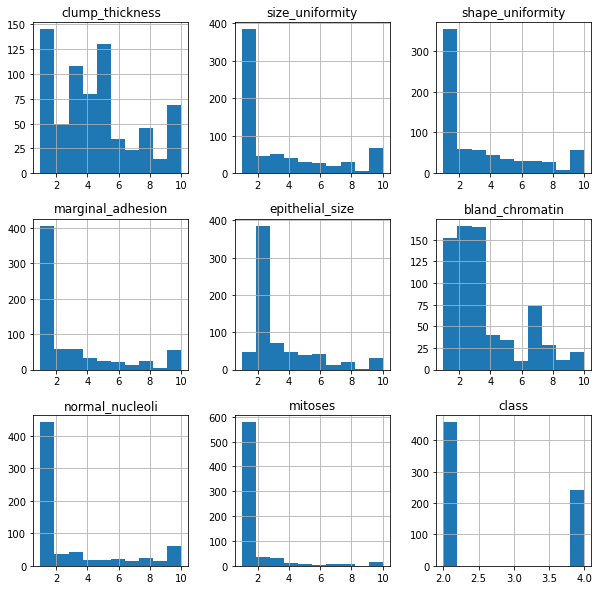

In [10]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()


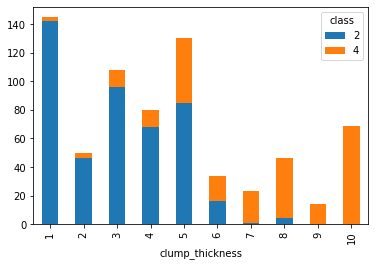

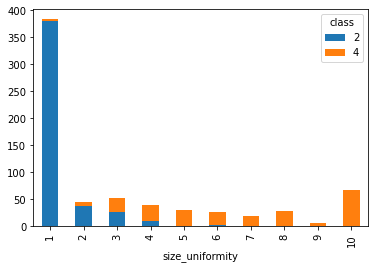

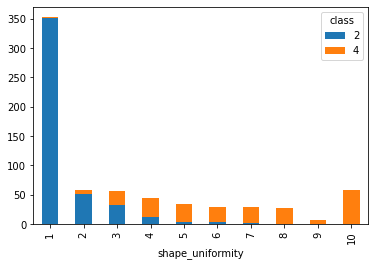

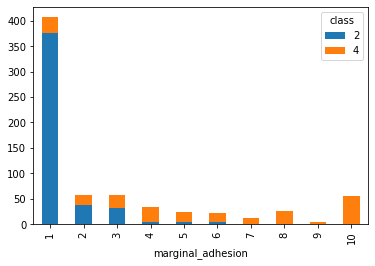

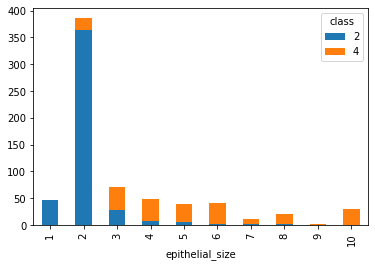

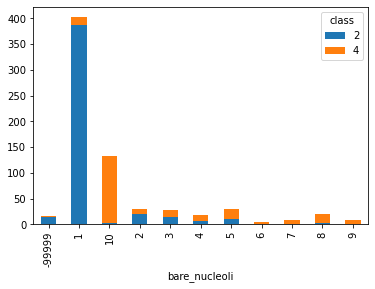

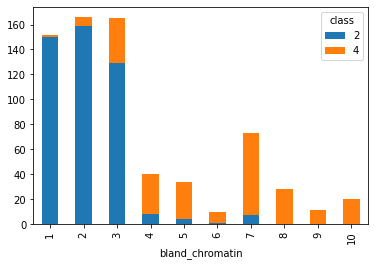

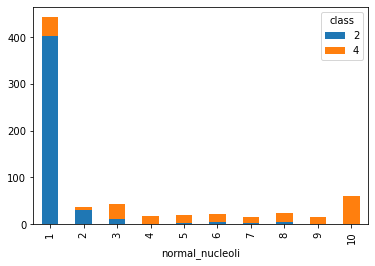

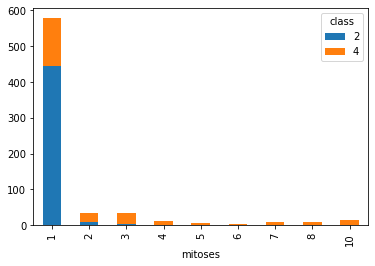

In [11]:
for i in range(9):
    column = df.iloc[:,i]
    graph = pd.crosstab(column,df['class'])
    graph.plot.bar(stacked=True)
    plt.show()

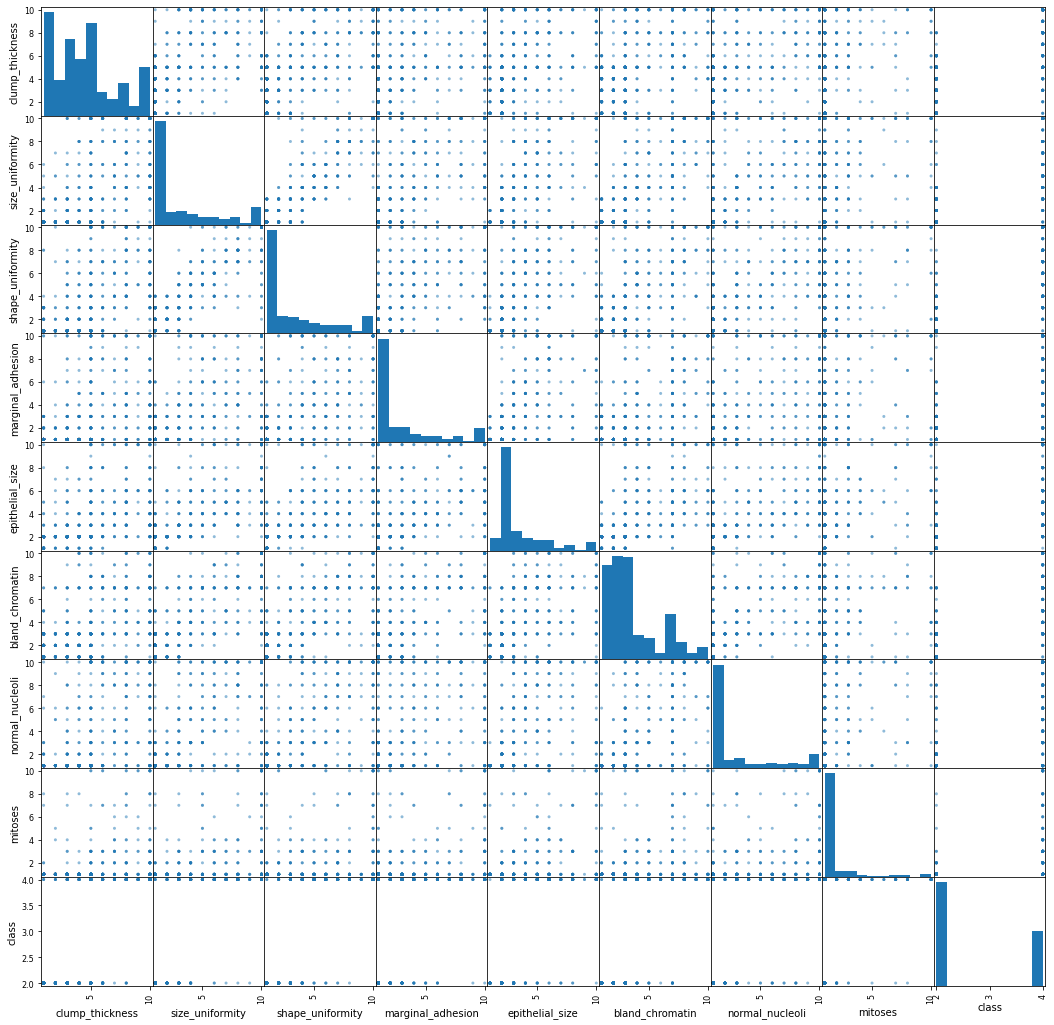

In [9]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()


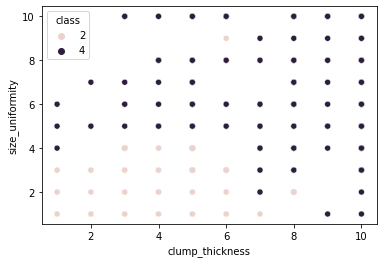

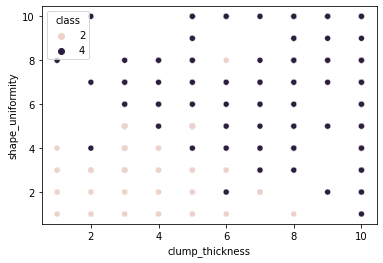

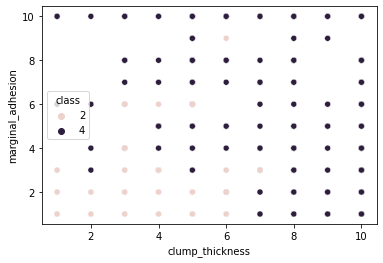

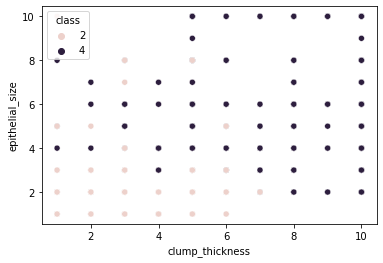

TypeError: 'value' must be an instance of str or bytes, not a int

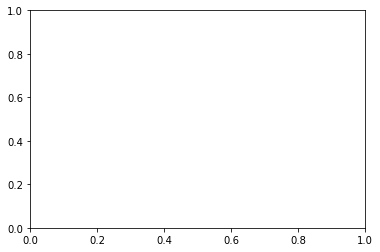

In [13]:
for i in range(9):
    x = df.iloc[:,i]
    for j in range(i+1,9):
        y = df.iloc[:,j]
        hue_parameter = df['class']
        ax = sb.scatterplot(x=x, y=y, hue=hue_parameter)
        plt.show()

In [10]:
# Data training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 

In [11]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [12]:
# Define models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.969610 (0.025301)
SVM: 0.651201 (0.065274)


In [13]:
# Make predictions on existing dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))

KNN
0.9571428571428572
SVM
0.6714285714285714


In [16]:
clf = KNeighborsClassifier(n_neighbors = 5)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

measures = np.array([[5,4,1,4,2,2,4,5,2]])
measures = measures.reshape(len(measures), -1)
prediction = clf.predict(measures)
print(prediction)

0.9571428571428572
[4]


In [17]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

measures = np.array([[5,4,1,4,2,2,4,5,2]])
measures = measures.reshape(len(measures), -1)
prediction = clf.predict(measures)
print(prediction)

0.6714285714285714
[2]
